In [158]:
import pandas as pd
import numpy as np

Data Loading


In [160]:
df=pd.read_csv("Car Prices.csv")

In [161]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [162]:
df.dtypes
strings=list(df.dtypes[df.dtypes=='object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [163]:
for col in strings:
    df[col] =df[col].str.lower().str.replace(' ','-') 

In [164]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1-series-m,2011,premium-unleaded-(required),335.0,6.0,manual,rear-wheel-drive,2.0,"factory-tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1-series,2011,premium-unleaded-(required),300.0,6.0,manual,rear-wheel-drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1-series,2011,premium-unleaded-(required),300.0,6.0,manual,rear-wheel-drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1-series,2011,premium-unleaded-(required),230.0,6.0,manual,rear-wheel-drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1-series,2011,premium-unleaded-(required),230.0,6.0,manual,rear-wheel-drive,2.0,luxury,compact,convertible,28,18,3916,34500


Exploratory data analysis

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1-series-m' '1-series' '100' '124-spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium-unleaded-(required)' 'regular-unleaded'
 'premium-unleaded-(recommended)' 'flex-fuel-(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear-wheel-drive' 'front-wheel-drive' 'all-wheel-drive'
 'four-wheel-drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory-tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr-hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [167]:
%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

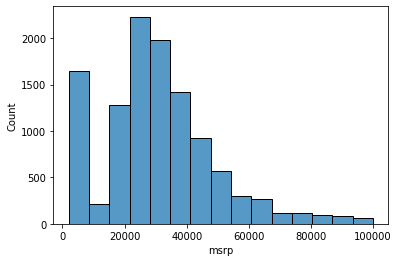

In [168]:
import matplotlib.pyplot as plt 
import seaborn as sns
#sns.histplot(df.msrp, bins =15)#for all prices
sns.histplot(df.msrp[df.msrp<100000], bins =15)#for prices less than 10000


In [169]:
#longtailed distribution
#this tail will confuse my model
#use log for price for compact price
df['msrp']=df['msrp'].apply(lambda x: np.log1p(x))

<AxesSubplot:xlabel='msrp', ylabel='Count'>

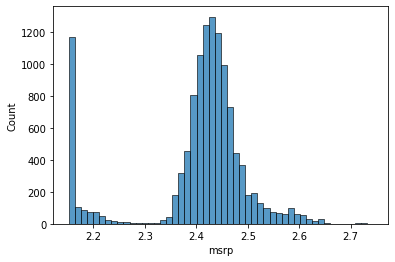

In [170]:
sns.histplot(np.log1p(df['msrp']),bins=50)
#this value is ideal for models as we have normal distribution

In [171]:
df.isnull().sum()#finding number of null values

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Validation Framework

In [172]:
#train 60, validation 20, test 20
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_test-n_val

In [173]:
#we need to shuffle this record, thus we will use an array after shuffling
idx=np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [174]:
df_train=df.iloc[idx[:n_train]]
df_val=df.iloc[idx[n_train:n_val+n_train]]
df_test=df.iloc[idx[n_val+n_train:]]


In [175]:
df_train = df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [176]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Linear Regression

In [177]:
 def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

Car Price baseline model


In [178]:
df_train.dtypes
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [179]:
base=['engine_hp',
       'engine_cylinders',
       'highway_mpg', 
       'city_mpg', 
       'popularity']
X_train=df_train[base].fillna(0).values #to extract the numpy values
#we are replacing nan values and adding 0s        

In [180]:
w0, w = train_linear_regression(X_train,y_train)

In [181]:
#using the name model for the same dataset prediction
y_pred=w0+X_train.dot(w)

<AxesSubplot:ylabel='Count'>

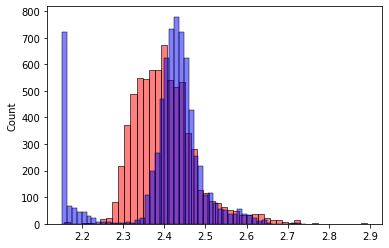

In [182]:
sns.histplot(y_pred,color='red', alpha=0.5,bins=50)
sns.histplot(y_train, color='blue', alpha=0.5,bins=50)
# alpha controls how transparent the bars are

In [183]:
#root mean square error :root of average of the squared difference of pred and actual
def rmse(y, y_pred):
    error=(y-y_pred)**2
    mse=error.mean()
    return np.sqrt(mse) 

Validating the model

In [184]:
def prepare_x(df):
    df_num=df[base]
    df_num=df_num.fillna(0)
    df_num=df_num.values
    return df_num

In [185]:
X_train=prepare_x(df_train)
w0, w= train_linear_regression(X_train,y_train)

X_val=prepare_x(df_val)
y_pred=w0+X_val.dot(w)

rmse(y_val, y_pred)

0.07580733319660847

Simple feature engineering


In [186]:
#we want to use age as a feature, we can see the predictions are better
def prepare_x(df_):
    df=df_.copy()
    df['age']=2017-df['year']
    features=base+['age']
    df_num=df[features]
    df_num=df_num.fillna(0)
    df_num=df_num.values
    return df_num

In [187]:
X_train=prepare_x(df_train)
w0, w= train_linear_regression(X_train,y_train)

X_val=prepare_x(df_val)
y_pred=w0+X_val.dot(w)

rmse(y_val, y_pred)

0.04992325539957632

<AxesSubplot:ylabel='Count'>

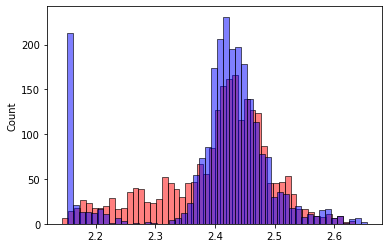

In [188]:
sns.histplot(y_pred,color='red', alpha=0.5,bins=50)
sns.histplot(y_val, color='blue', alpha=0.5,bins=50)

Catagorical variables

In [189]:
#these are the variables that are 

In [204]:
#these are the variables that are categorial and typically have string values
#here we are encoding the number of doors
for v in [2,3,4]:
    df_train['num_doors_%s' %v]=(df_train.number_of_doors==v).astype('int')

#we will also be adding makes of the top makers
makes=list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [207]:
#we want to use age as a feature, we can see the predictions are better
def prepare_x(df_):
    df=df_.copy()
    features = base.copy()

    df['age']=2017-df.year
    
    features.append('age')
    for v in [2,3,4]:
        df['num_doors_%s' %v]=(df.number_of_doors==v).astype('int')
        features.append('num_doors_%s' %v)
    for v in makes:
        df['make_%s' %v]   =(df.make==v).astype('int')
        features.append('make_%s' %v)

    df_num=df[features]
    print(features)
    df_num=df_num.fillna(0)
    df_num=df_num.values
    return df_num

In [208]:
X_train=prepare_x(df_train)
w0, w= train_linear_regression(X_train,y_train)

X_val=prepare_x(df_val)
y_pred=w0+X_val.dot(w)

rmse(y_val, y_pred)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge']
['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_chevrolet', 'make_ford', 'make_volkswagen', 'make_toyota', 'make_dodge']


0.049158456554707

In [209]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int32
num_doors_3            int32
num_doors_4            int32
dtype: object

In [210]:
df.keys()

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [221]:
#doing the above step for each category
categorical_variables=['make','engine_fuel_type','transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style']
categories = {}

for c in categorical_variables:
    categories[c]=list(df[c].value_counts().head().index)
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular-unleaded',
  'premium-unleaded-(required)',
  'premium-unleaded-(recommended)',
  'flex-fuel-(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front-wheel-drive',
  'rear-wheel-drive',
  'all-wheel-drive',
  'four-wheel-drive'],
 'number_of_doors': [4.0, 2.0, 3.0],
 'market_category': ['crossover',
  'flex-fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr-suv',
  'coupe',
  'convertible',
  '4dr-hatchback']}

In [222]:
#we want to use age as a feature, we can see the predictions are better
def prepare_x(df_):
    df=df_.copy()
    features = base.copy()

    df['age']=2017-df.year
    
    features.append('age')
    for v in [2,3,4]:
        df['num_doors_%s' %v]=(df.number_of_doors==v).astype('int')
        features.append('num_doors_%s' %v)
    for c, values in categories.items():
        df['%s_%s' %(c,v)]   =(df[c]==v).astype('int')
        features.append('%s_%s' %(c,v))

    df_num=df[features]
    print(features)
    df_num=df_num.fillna(0)
    df_num=df_num.values
    return df_num

In [223]:
X_train=prepare_x(df_train)
w0, w= train_linear_regression(X_train,y_train)

X_val=prepare_x(df_val)
y_pred=w0+X_val.dot(w)

rmse(y_val, y_pred)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'num_doors_2', 'num_doors_3', 'num_doors_4', 'make_4', 'engine_fuel_type_4', 'transmission_type_4', 'driven_wheels_4', 'number_of_doors_4', 'market_category_4', 'vehicle_size_4', 'vehicle_style_4']


LinAlgError: Singular matrix